In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# This Code we will implement Simple Linear Regression from scratch using Least Square Rule



Straight line equation (hypothesis function):

$$y = \beta_0 + \beta_1 x$$

Loss function:

$$J(\beta_0, \beta_1) = \sum_{i=1}^{n} \big(y_i - (\beta_0 + \beta_1 x_i)\big)^2$$

Closed-form solution:

$$\hat{\beta}_1 = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$

$$\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}$$





## 1. Least Squares (LSQ) Method

The **Least Squares Method** is a statistical approach used to find the best-fitting line through a set of data points.  
The line is defined as:

\[
y = b_0 + b_1 x
\]

where:
- \( b_0 \) is the intercept (value of \( y \) when \( x = 0 \))
- \( b_1 \) is the slope (change in \( y \) per unit change in \( x \))

The goal is to minimize the **sum of squared errors (residuals)**:

\[
\text{SSE} = \sum (y_i - \hat{y}_i)^2
\]

where:
- \( y_i \) is the actual value,
- \( \hat{y}_i \) is the predicted value from the line.

The optimal slope and intercept are given by:

\[
b_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}
\]

\[
b_0 = \bar{y} - b_1 \bar{x}
\]

---

## 2. The Boston Housing Dataset

The **Boston Housing dataset** is a classic dataset used in regression problems.  
It contains **506 samples** of houses in Boston suburbs, with **13 features** describing each area.  

Some examples of features:
- `RM`: average number of rooms per dwelling
- `LSTAT`: % of lower-status population
- `CRIM`: per capita crime rate
- `TAX`: property tax rate
- `DIS`: distance to employment centers  

The **target variable** is `MEDV`, the median value of owner-occupied homes (in \$1000s).

---

## 3. Weaknesses of the LSQ Method and Dataset

### ⚠️ Weaknesses of Least Squares (when using one feature):
- **Over-simplification**: Real-world house prices depend on multiple factors. Using only one feature (e.g., `RM`) ignores interactions.  
- **Assumes linearity**: LSQ assumes a straight-line relationship, but housing data often shows non-linear trends.  
- **Sensitive to outliers**: A few extreme data points can strongly affect the slope and intercept.  

### ⚠️ Weaknesses of the Boston dataset:
- **Small size**: Only 506 samples, which is very small by modern standards.  
- **Outdated**: Collected in the 1970s, so it does not reflect today’s housing market.  
- **Ethical concerns**: Includes a feature (`B` or `% lower status`) that reflects racial and socio-economic bias. This makes it unsuitable for some modern applications.  
- **Limited scope**: Data is from a single city (Boston), so it doesn’t generalize well.  

---

✅ In practice, LSQ is a great introduction to regression, but for housing prices, we usually move on to **multiple linear regression**, **regularization methods**, or even **non-linear models (e.g., trees, neural nets)** for better performance.


In [57]:
Df=pd.read_csv("/content/Boston.csv")

In [58]:
Df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [59]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's\n"

In [60]:
Df.isnull().sum()

,0
Unnamed: 0,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0


In [61]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [62]:
Df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [63]:
# We need to find the most correlated feature with the target so we can use it
import seaborn as sns
corr = Df.corr(method='pearson')
corr['medv'].sort_values()

,medv
lstat,-0.737663
ptratio,-0.507787
indus,-0.483725
tax,-0.468536
nox,-0.427321
crim,-0.388305
rad,-0.381626
age,-0.376955
Unnamed: 0,-0.226604
chas,0.175260


<Axes: xlabel='lstat', ylabel='medv'>

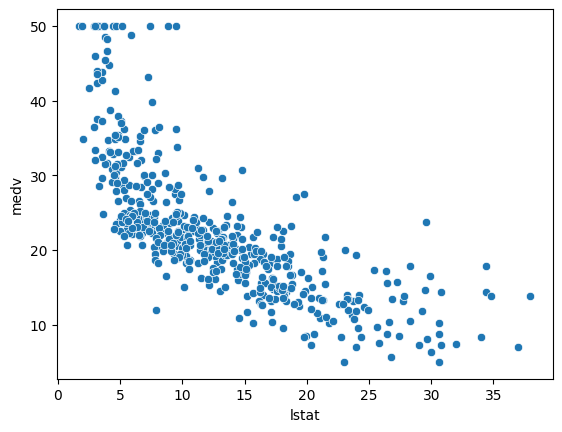

In [64]:
sns.scatterplot(x=Df['lstat'],y=Df['medv'])

<Axes: xlabel='rm', ylabel='medv'>

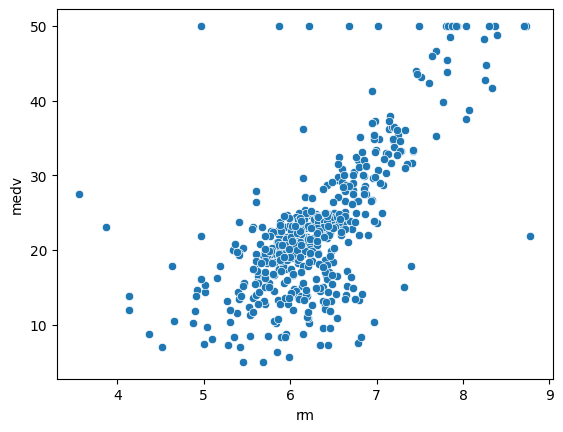

In [65]:
sns.scatterplot(x=Df['rm'],y=Df['medv'])

In [97]:
def Least_Square_Method(X_train,y_train):
  mean_x=X_train.mean()
  mean_y=y_train.mean()
  sum_xy_diff=0
  sum_x_diff_sq=0
  X_train = X_train.reset_index(drop=True)
  y_train = y_train.reset_index(drop=True) # we reset the indeces as after sampling the indeces is shuffeld
  for i in range(len(X_train)-1):
    sum_xy_diff += (X_train[i] - mean_x) * (y_train[i] - mean_y)
    sum_x_diff_sq += (X_train[i] - mean_x)**2
  b1 = sum_xy_diff / sum_x_diff_sq
  b0 = mean_y - b1*mean_x
  return b1,b0

In [67]:
'''
def Least_Square_Method(X_train,y_train):
  # Reset the indices of the Series
  X_train = X_train.reset_index(drop=True)
  y_train = y_train.reset_index(drop=True)

  mean_x=X_train.mean()
  mean_y=y_train.mean()
  sum_x_diff_sq = 0
  sum_xy_diff = 0
  for i in range(len(X_train)):
    sum_xy_diff += (X_train[i] - mean_x) * (y_train[i] - mean_y)
    sum_x_diff_sq += (X_train[i] - mean_x)**2
  b1 = sum_xy_diff / sum_x_diff_sq
  b0 = mean_y - b1*mean_x
  return b0,b1
  '''

'\ndef Least_Square_Method(X_train,y_train):\n  # Reset the indices of the Series\n  X_train = X_train.reset_index(drop=True)\n  y_train = y_train.reset_index(drop=True)\n\n  mean_x=X_train.mean()\n  mean_y=y_train.mean()\n  sum_x_diff_sq = 0\n  sum_xy_diff = 0\n  for i in range(len(X_train)):\n    sum_xy_diff += (X_train[i] - mean_x) * (y_train[i] - mean_y)\n    sum_x_diff_sq += (X_train[i] - mean_x)**2\n  b1 = sum_xy_diff / sum_x_diff_sq\n  b0 = mean_y - b1*mean_x\n  return b0,b1\n  '

In [98]:
## Let's try model one with LSTAT ---> MEDV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Df['lstat'], Df['medv'], test_size=0.2, random_state=42)


m_1,c_1=Least_Square_Method(X_train,y_train)

In [100]:
m_1

np.float64(-0.9670657708627716)

In [101]:
c_1

np.float64(34.84361287035898)

In [99]:
def funct_calc_pred(m,c,X_test,y_test):
  y_pred=[]
  X_test = X_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)
  for i in range(len(X_test)):
    y_pred.append(m*X_test[i]+c)
  return y_pred

<Axes: ylabel='medv'>

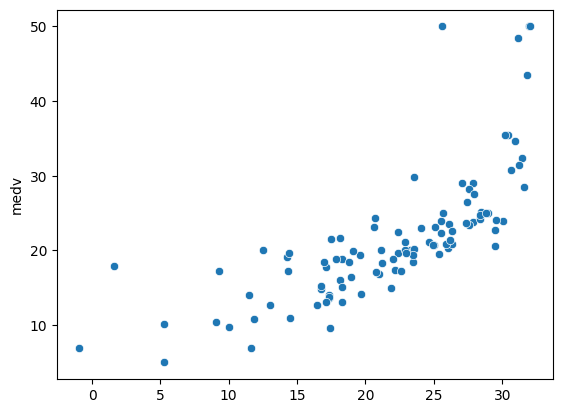

In [102]:
y_pred=funct_calc_pred(m_1,c_1,X_test,y_test)
sns.scatterplot(x=y_pred,y=y_test)


In [103]:
y_test

,medv
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [104]:
y_pred

[np.float64(26.101338301759526),
 np.float64(31.4298706992134),
 np.float64(17.3687343908687),
 np.float64(29.505409815196483),
 np.float64(18.142387007558916),
 np.float64(23.267835593131608),
 np.float64(17.11729729044438),
 np.float64(11.47930384631442),
 np.float64(22.397476399355114),
 np.float64(20.985560373895467),
 np.float64(17.513794256498112),
 np.float64(18.306788188605587),
 np.float64(-0.9184793361463051),
 np.float64(22.91002125791238),
 np.float64(23.490260720430044),
 np.float64(23.567625982099067),
 np.float64(17.842596618591458),
 np.float64(5.232058966540915),
 np.float64(31.97142753089655),
 np.float64(17.310710444616934),
 np.float64(28.470649440373318),
 np.float64(27.890409977855654),
 np.float64(12.987926448860343),
 np.float64(25.492086866115983),
 np.float64(19.66068026781347),
 np.float64(17.301039786908305),
 np.float64(26.04331435550776),
 np.float64(16.749812297516524),
 np.float64(18.142387007558916),
 np.float64(21.207985501193903),
 np.float64(20.63741

In [105]:
mse = np.mean((y_test - y_pred)**2)


In [106]:
mse

np.float64(33.5239382193715)

In [107]:
ss_res = np.sum((y_test - y_pred)**2)   # residual sum of squares
ss_tot = np.sum((y_test - np.mean(y_test))**2)  # total sum of squares
r2 = 1 - (ss_res / ss_tot)
print("R²:", r2)

R²: 0.5428581920275246


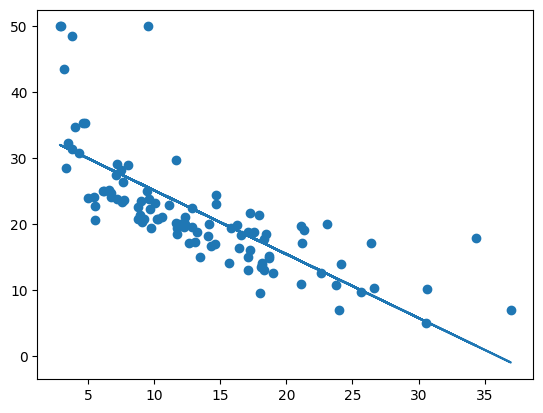

In [108]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred)